In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Question 2

In [4]:
##################### The Functions for Question 2 #####################

## Generate identical and independece random variables with n dimension
def generate_iid( n, variable_count = 100000):
    ## n is the feature size of each X (dimension)
    ## variable_count is the count of random variables we want to make
    
    ## Fix the seed for reproduction to be the same each time we call the function!
    np.random.seed(1)
    
    ## This will create Identical Random Variables
    ## Also It make them independence as possible
    X = []
    for _ in range(variable_count):
        x_generated = np.random.uniform(0,1,size = n)
        X.append(x_generated)
    
    return X

## Volume functoin is due to calculate the volume of the data 
## Ex: With n = 3, we have a cube to calculate the volume
def volume_function(n, variable_count = 100000, varbose= False):
    ## n is the feature size of each X
    ## variable_count is the count of random variables we want to make
    ## verbose variable is weather to print the progress or not
    
    X_input = generate_iid(n, variable_count)
    ## X_input is the Random set of Variables with uniform distribution
    
    base = (10**(-4)) * (6 / np.sqrt(6 * np.pi)) 
    value = np.zeros(n)
    
    for idx, x in enumerate(X_input):
        value += np.exp(-np.sqrt(3) * (x - 0.5))
        if varbose:
            print('Creating Value result matrix, Progress: ', int(idx / len(X_input)),'%') 
    
    value = value * base
    return value



In [5]:
##################### Distribution for n_dimentionality #####################
distribution_50_D = volume_function(n = 50)
distribution_100_D = volume_function(n = 100)
distribution_200_D = volume_function(n = 200)
distribution_1000_D = volume_function(n = 1000)

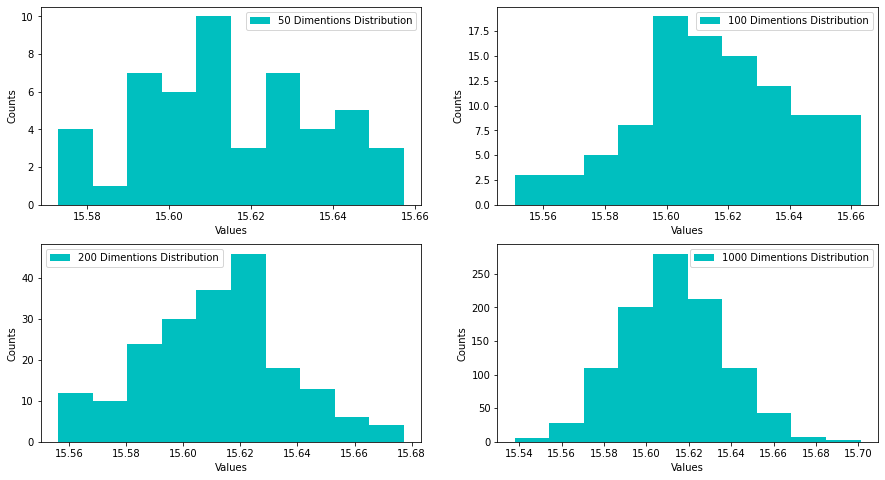

In [6]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

axes[0][0].hist(distribution_50_D, color='c')
axes[0][0].legend(['50 Dimentions Distribution'])
axes[0][0].set_xlabel('Values')
axes[0][0].set_ylabel('Counts')

axes[0][1].hist(distribution_100_D, color='c')
axes[0][1].legend(['100 Dimentions Distribution'])
axes[0][1].set_xlabel('Values')
axes[0][1].set_ylabel('Counts')

axes[1][0].hist(distribution_200_D, color='c')
axes[1][0].legend(['200 Dimentions Distribution'])
axes[1][0].set_xlabel('Values')
axes[1][0].set_ylabel('Counts')

axes[1][1].hist(distribution_1000_D, color='c')
axes[1][1].legend(['1000 Dimentions Distribution'])
axes[1][1].set_xlabel('Values')
axes[1][1].set_ylabel('Counts')

plt.savefig('Q2_plot.png')
plt.show()


# Question 3

In [7]:
##################### Probability functions #####################

#### Note: This functions implemented here are came from calculating them by hand on paper

## X,Y joint distribution density function
def Probab_X_Y(a, b, mu, X,Y):
    var1 = 1 / (2* np.pi * a*b)
    var2 = ( np.power((Y-mu),2) / 2*(a^2))
    var3 = ( np.power((X - Y), 2) / 2*(b^2))
    value = var1* np.exp(-(var2+var3))
    
    return value

## Y density function
def Probab_Y(a, b, mu, X,Y):
    # above the division formula
    var1 = 2* a^2 * b^2
    var2 = ( np.power((Y-mu),2) / 2*(a^2))
    var3 = ( np.power((X - Y), 2) / 2*(b^2))
    
    # Calculate the above matrix
    above = var1 * np.exp(-(var2+var3))
    
    # below the division formula
    var5 = 4 * np.pi * a * b
    var6 = (mu * b^2) - ((b^2) + (a^2)) * Y + ((a^2) * X)
    
    # Calculate the below matrix
    below = var5 * var6
    
    # And at last calculate the function value
    value = np.divide(above, below)
    
    return value

## Calculate the probabily ofY given the information X
def Probab_Y_Given_X(b,Y,X):
    above = Y - X
    below = b^2
    
    value = above / below
    
    return value

In [8]:
np.random.seed(1)
X = np.random.normal(0,1, 1000)
Y = np.random.normal(0,1, 1000)

In [9]:
p_x_y = Probab_X_Y(40, 3, 0, X, Y)

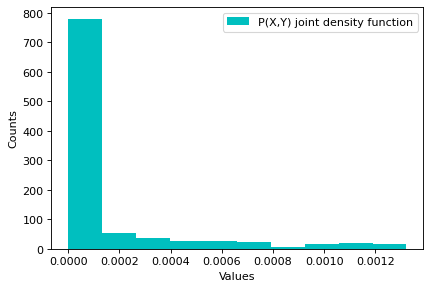

In [10]:
plt.figure(figsize=(6, 4), dpi=80)
plt.hist(p_x_y ,color='c')
plt.legend(["P(X,Y) joint density function"])
plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

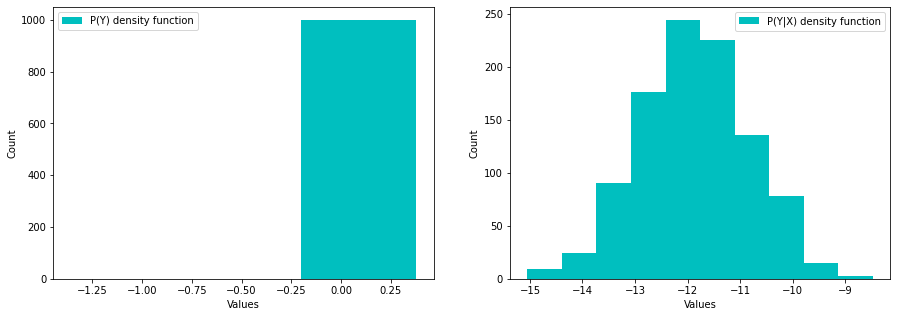

In [11]:
##### Show two graphs side by side #####

fig, axes = plt.subplots(1,2,figsize=(15,5))


p_y = Probab_Y(40, 3, 0, X, Y)
axes[0].hist(p_y,bins=3,color='c')
axes[0].legend(["P(Y) density function"])
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Count")



p_y_given_x = Probab_Y_Given_X(3, Y= Y,X = 11.9)
axes[1].hist(p_y_given_x, color='c')
axes[1].legend(["P(Y|X) density function"])
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Count")
plt.savefig("Q3_plot.png")

plt.show()


# Question 4

In [2]:
################ Computing eignvalues and eignvectors to chack the results of the calculation by hand ################ 
matrix = np.matrix('64 -24; -25 64')

eignvalue, eignvector = np.linalg.eig(matrix)

print('eign value: \n',eignvalue)
print('eign vector: \n',eignvector)

eign value: 
 [88.49489743 39.50510257]
eign vector: 
 [[ 0.69985421  0.69985421]
 [-0.71428571  0.71428571]]


In [3]:
################ Question 4 Last part ################
np.random.seed(10)

mean = [0 ,0]
cov = np.matrix('64 -25;-25 64')
x = np.random.multivariate_normal(mean, cov, 200)

[ 0.69985421 -0.71428571]
[0.69985421 0.71428571]


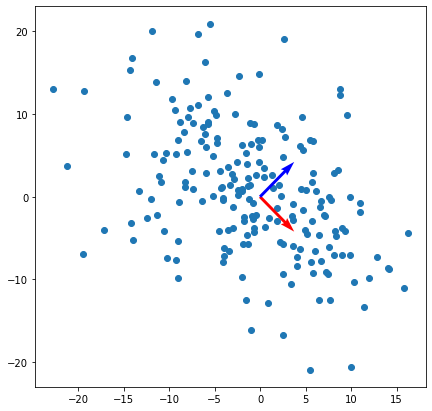

In [4]:
################ Plot the data and their eignvector ################

fig = plt.figure(figsize=(7,7))
X = x[:,0]
Y = x[:,1]

plt.scatter(X, Y)

## our plot origin
origin = [0, 0]

## get each eignvector
eig_vec1 = eignvector[:,0]
eig_vec2 = eignvector[:,1]

## Convert matrixes to array
eig_vec1 = np.asarray(eig_vec1).flatten()
eig_vec2 = np.asarray(eig_vec2).flatten()

print(eig_vec1)
print(eig_vec2)

plt.quiver(*origin ,*eig_vec1, color = 'r',scale=8)
plt.quiver(*origin ,*eig_vec2, color = 'b',scale=8)


plt.show()

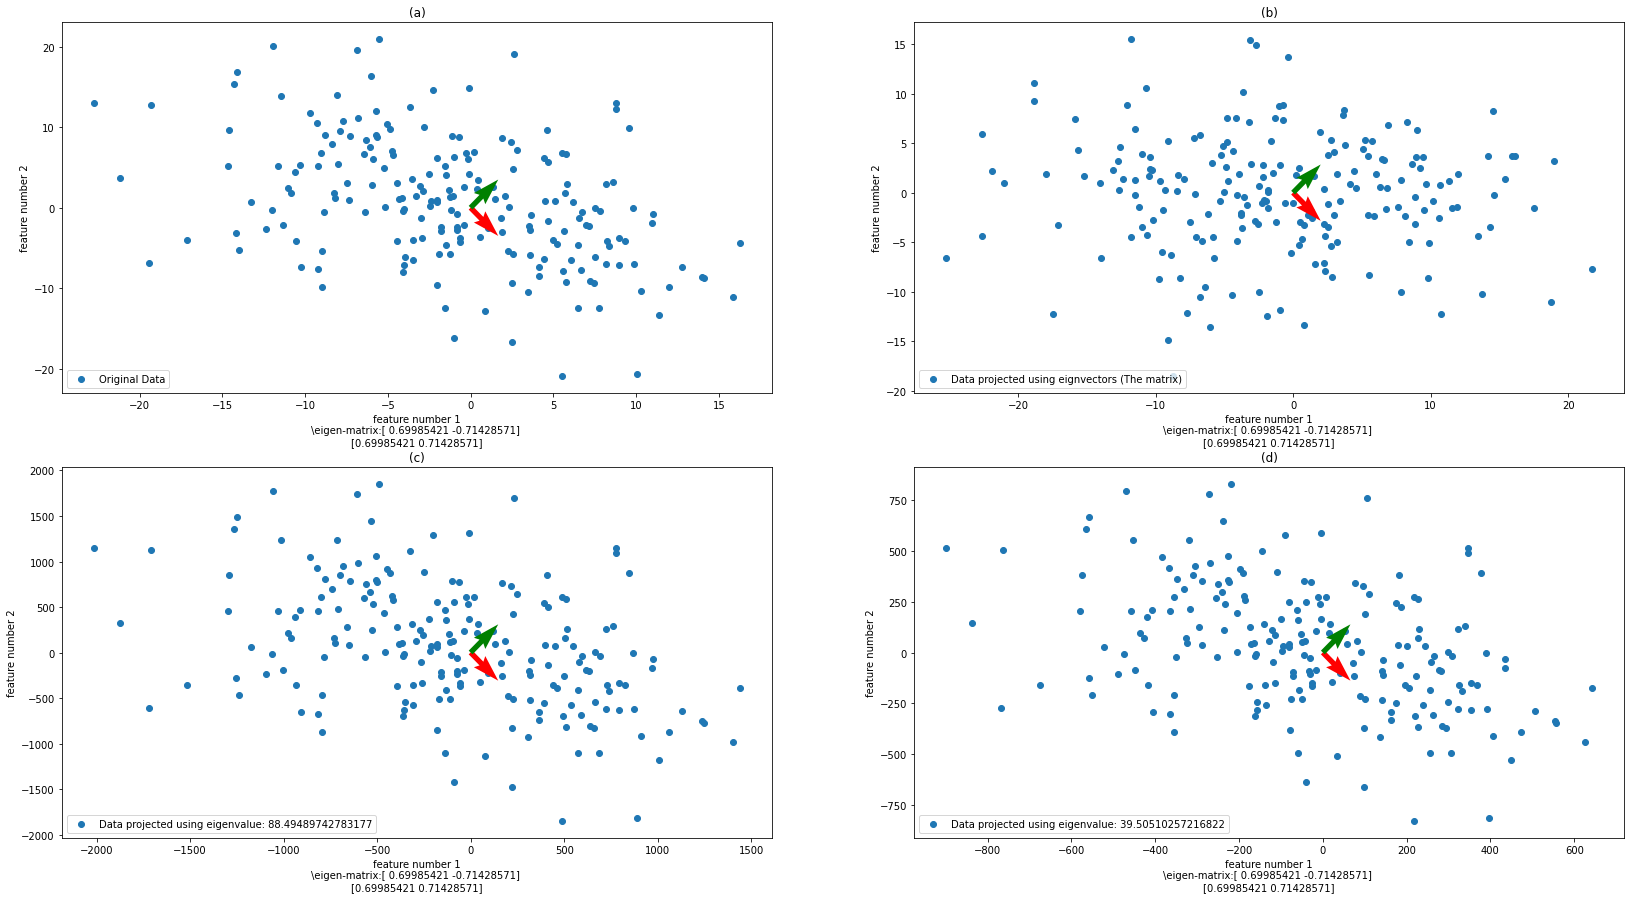

In [79]:
############## Projecting Data using covariance vectors ################

## To avoid duplicate code we made this function to plot data using scatter and quiver plot 
def plot_scatter(X,Y, ax,legend , title, description=''):
    eig_vec1, eig_vec2 = calculate_eigen_vectors(X,Y)
    
    ax.scatter(X , Y)
    ax.legend([legend], loc='lower left')
    ax.set_xlabel(f'feature number 1\n\eigen-matrix:%s \n%s' % (eig_vec1,eig_vec2), description)
    ax.set_ylabel('feature number 2')
    ax.set_title(title)
    
    ax.quiver(*origin ,*eig_vec1, color = 'r',scale=18)
    ax.quiver(*origin ,*eig_vec2, color = 'g',scale=18)
    
def calculate_eigen_vectors(X,Y):
    cov = np.cov(X,Y)
    _, eigen_vector = np.linalg.eig(cov)
    
    ## get each eignvector
    eig_vec1 = eignvector[:,0]
    eig_vec2 = eignvector[:,1]

    ## Convert matrixes to array
    eig_vec1 = np.asarray(eig_vec1).flatten()
    eig_vec2 = np.asarray(eig_vec2).flatten()
    
    return eig_vec1, eig_vec2

## transform data
## Here we are multiplying each feature vector to covariance eignvectors (A 2 by 2 matrix as eignvectors)
x_transformed = x.dot(eignvector)

X_new = x_transformed[:,0]
Y_new = x_transformed[:,1]
## Refining X_new and Y_new as a simple vector
X_new = np.asarray(X_new).flatten()
Y_new = np.asarray(Y_new).flatten()

fig, axes = plt.subplots(2, 2, figsize=(28,15))

plot_scatter(X,Y, axes[0][0], "Original Data", "(a)") 
plot_scatter(X_new, Y_new, axes[0][1], "Data projected using eignvectors (The matrix)","(b)")
plot_scatter(X * eignvalue[0], Y * eignvalue[0], axes[1][0], f"Data projected using eigenvalue: %s" % eignvalue[0], "(c)")
plot_scatter(X * eignvalue[1], Y * eignvalue[1], axes[1][1], f"Data projected using eigenvalue: %s" % eignvalue[1], "(d)")

plt.show()

<!DOCTYPE html>
<html dir="rtl" lang="ar">
    <head>
        <meta charset="utf-8">
    </head>
    <body>
        <div dir='rtl'>
            <h2> فارسی </h2>
            <h4>
             همانطور که مشاهده می‌شود، داده‌ها پس از ضرب داخلی در یکی از مقادیر ویژه و یا بردار ویژه، مقادیر مشابهی خواهند‌ داشت.(تنها در مقیاس داده‌ها تفاوت خواهیم داشت). در نتیجه‌ی این تبدیل متوجه می شویم که داده‌ها همگی دارای ماتریس ویژه( ماتریسی از بردار‌های ویژه) یکسان خواهند بود. این تبدیل‌ها همگی فرمول عبارت ویژه و بردار ویژه را که در زیر آمده است،تایید میکنند.
            </h4>
            <h3 dir='ltr'> Au = λu </h3>
        </div>
        <br>
        <div dir='ltr'>
            <h2> English </h2>
            <h4>
                 As we can see here in the projection of data with eigen-vectors or each eigen-values, There is no difference in their correlation (Just scaling difference). In the result of the transformation, It's clear that all these data have the same eigen-matrix. So our job has showed the formula mentioned below with an example. 
            </h4>
            <h3> Au = λu </h3>
        </div>
    </body>
</html>

# Question 5

In [72]:
##################### sum of two uniform distribution with i.i.d. property #####################

np.random.seed(10)
x1 = np.random.uniform(0,1,100)
x2 = np.random.uniform(0,1,100)

## TODO: y = Convolutioin(x1,x2)


In [108]:
##################### Generate Cummulative Distribution Probability #####################
def generate_cdf(x1):
    ## Input is the pdf(probabilty density function) array
    
    ## This array will contain the cdf values 
    cdf_arr = np.zeros(len(x1))
    
    total_value = 0
    for idx, x in enumerate(x1):
        cdf_arr[idx] = x / x1.sum()
        total_value += cdf_arr[idx]
        
        cdf_arr[idx] = total_value

        
    return cdf_arr

x1_cdf = generate_cdf(x1)
x2_cdf = generate_cdf(x2)

## Y is sum of x1 and x2, so it's CDF will be
## TODO: Convolution x1 and x2

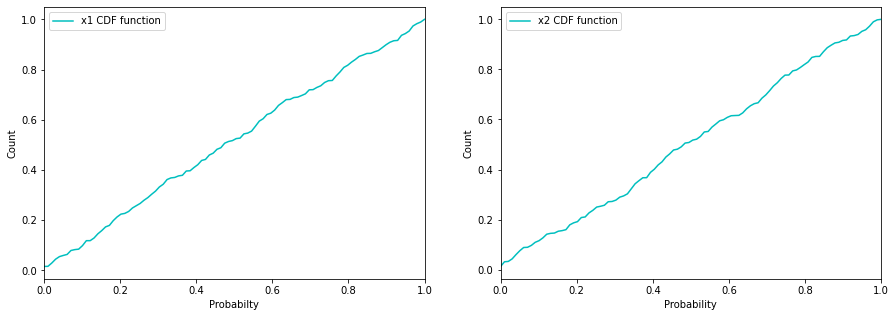

In [112]:

fig, axes = plt.subplots(1,2,figsize = (15,5))


axes[0].plot(np.linspace(0,1, num=100),x1_cdf,color='c')
axes[0].set_xlim([0,1])
axes[0].legend(["x1 CDF function"])
axes[0].set_xlabel("Probabilty")
axes[0].set_ylabel("Count")



axes[1].plot(np.linspace(0,1, num=100),x2_cdf,color='c')
axes[1].set_xlim([0,1])
axes[1].legend(["x2 CDF function"])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Count")

plt.show()